<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork26802033-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo">
    </a>
</p>


# **Space X  Falcon 9 First Stage Landing Prediction**


## Hands on Lab: Complete the Machine Learning Prediction lab


Estimated time needed: **60** minutes


Space X advertises Falcon 9 rocket launches on its website with a cost of 62 million dollars; other providers cost upward of 165 million dollars each, much of the savings is because Space X can reuse the first stage. Therefore if we can determine if the first stage will land, we can determine the cost of a launch. This information can be used if an alternate company wants to bid against space X for a rocket launch.   In this lab, you will create a machine learning pipeline  to predict if the first stage will land given the data from the preceding labs.


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/landing_1.gif)


Several examples of an unsuccessful landing are shown here:


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/crash.gif)


Most unsuccessful landings are planed. Space X; performs a controlled landing in the oceans.


## Objectives


Perform exploratory  Data Analysis and determine Training Labels

*   create a column for the class
*   Standardize the data
*   Split into training data and test data

\-Find best Hyperparameter for SVM, Classification Trees and Logistic Regression

*   Find the method performs best using test data


## Import Libraries and Define Auxiliary Functions


In [55]:
import piplite
await piplite.install(['numpy'])
await piplite.install(['pandas'])
await piplite.install(['seaborn'])

We will import the following libraries for the lab


In [56]:
# Pandas is a software library written for the Python programming language for data manipulation and analysis.
import pandas as pd
# NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np
# Matplotlib is a plotting library for python and pyplot gives us a MatLab like plotting framework. We will use this in our plotter function to plot data.
import matplotlib.pyplot as plt
#Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns
# Preprocessing allows us to standarsize our data
from sklearn import preprocessing
# Allows us to split our data into training and testing data
from sklearn.model_selection import train_test_split
# Allows us to test parameters of classification algorithms and find the best one
from sklearn.model_selection import GridSearchCV
# Logistic Regression classification algorithm
from sklearn.linear_model import LogisticRegression
# Support Vector Machine classification algorithm
from sklearn.svm import SVC
# Decision Tree classification algorithm
from sklearn.tree import DecisionTreeClassifier
# K Nearest Neighbors classification algorithm
from sklearn.neighbors import KNeighborsClassifier

This function is to plot the confusion matrix.


In [57]:
def plot_confusion_matrix(y,y_predict):
    "this function plots the confusion matrix"
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['did not land', 'land']); ax.yaxis.set_ticklabels(['did not land', 'landed']) 
    plt.show() 

## Load the dataframe


Load the data


In [58]:
from js import fetch
import io

URL1 = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv"
resp1 = await fetch(URL1)
text1 = io.BytesIO((await resp1.arrayBuffer()).to_py())
data = pd.read_csv(text1)

In [59]:
data.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


In [60]:
URL2 = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_3.csv'
resp2 = await fetch(URL2)
text2 = io.BytesIO((await resp2.arrayBuffer()).to_py())
X = pd.read_csv(text2)

In [61]:
X.head(100)

,FlightNumber,PayloadMass,Flights,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,Orbit_GTO,Orbit_HEO,Orbit_ISS,...,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062,GridFins_False,GridFins_True,Reused_False,Reused_True,Legs_False,Legs_True
0,1.0,6104.959412,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,2.0,525.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,3.0,677.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,4.0,500.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,5.0,3170.000000,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,86.0,15400.000000,2.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
86,87.0,15400.000000,3.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
87,88.0,15400.000000,6.0,5.0,5.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
88,89.0,15400.000000,3.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0


## TASK  1


Create a NumPy array from the column <code>Class</code> in <code>data</code>, by applying the method <code>to_numpy()</code>  then
assign it  to the variable <code>Y</code>,make sure the output is a  Pandas series (only one bracket df\['name of  column']).


In [62]:
# Extract the 'Class' column as a Pandas Series and convert it to a NumPy array
Y = data['Class'].to_numpy()

# Verify the type of Y
print("Type of Y:", type(Y))  # Should output <class 'numpy.ndarray'>

# Verify the shape of Y
print("Shape of Y:", Y.shape)  # Should output (number_of_samples,)

Type of Y: <class 'numpy.ndarray'>
Shape of Y: (90,)


## TASK  2


Standardize the data in <code>X</code> then reassign it to the variable  <code>X</code> using the transform provided below.


In [63]:
# students get this 
transform = preprocessing.StandardScaler()

In [64]:
# Initialize the StandardScaler (provided)
transform = preprocessing.StandardScaler()

# Fit the scaler on X and transform the data
X = transform.fit_transform(X)

# Verify the standardization (mean ~0, std ~1)
print("Mean after standardization:", X.mean(axis=0))  # Should be close to 0
print("Std after standardization:", X.std(axis=0))   # Should be close to 1

Mean after standardization: [ 1.48029737e-17 -1.41861831e-16 -7.27812872e-17 -1.97372982e-17
  5.92118946e-17 -4.81096644e-17 -2.86807615e-17 -7.40148683e-18
 -4.81096644e-17  4.68760833e-17  6.16790569e-18  0.00000000e+00
 -6.90805438e-17 -2.86807615e-17 -5.24271984e-17  1.78869265e-17
 -8.14163551e-17  2.71387850e-17  5.30439890e-17  5.30439890e-17
 -1.41861831e-17 -1.48029737e-17  6.16790569e-18  3.08395285e-18
 -4.81096644e-17 -4.81096644e-17 -4.81096644e-17 -4.81096644e-17
 -4.81096644e-17 -4.81096644e-17 -4.81096644e-17 -4.81096644e-17
 -4.81096644e-17 -4.81096644e-17 -4.81096644e-17 -4.81096644e-17
 -4.81096644e-17 -4.81096644e-17 -4.81096644e-17 -4.81096644e-17
 -4.81096644e-17 -4.81096644e-17 -4.81096644e-17 -3.70074342e-18
 -4.81096644e-17 -4.81096644e-17 -4.81096644e-17 -4.81096644e-17
 -4.81096644e-17  5.55111512e-18 -4.81096644e-17  5.55111512e-18
  5.55111512e-18 -4.81096644e-17  5.55111512e-18  5.55111512e-18
 -4.81096644e-17 -4.81096644e-17  5.55111512e-18  5.55111512e-

We split the data into training and testing data using the  function  <code>train_test_split</code>.   The training data is divided into validation data, a second set used for training  data; then the models are trained and hyperparameters are selected using the function <code>GridSearchCV</code>.


#Step 1: Split Data into Training and Test Sets

In [65]:
from sklearn.model_selection import train_test_split

# Split into training (80%) and test (20%) sets
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, 
    test_size=0.2, 
    random_state=42  # Ensures reproducibility
)

print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)

Training set shape: (72, 83)
Test set shape: (18, 83)


#Step 2: Further Split Training Data into Training & Validation Sets
We use train_test_split again to create a validation set from the training data.
This helps in tuning hyperparameters without touching the test set.

In [66]:
# Split training data into training (80%) and validation (20%) sets
X_train_sub, X_val, Y_train_sub, Y_val = train_test_split(
    X_train, Y_train, 
    test_size=0.2, 
    random_state=42
)

print("Sub-training set shape:", X_train_sub.shape)
print("Validation set shape:", X_val.shape)

Sub-training set shape: (57, 83)
Validation set shape: (15, 83)


#Step 3: Hyperparameter Tuning with GridSearchCV
We will optimize hyperparameters for three models:

Support Vector Machine (SVM)

Decision Tree

Logistic Regression

3.1 SVM Hyperparameter Tuning

In [67]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid_svm = {
    'C': [0.1, 1, 10, 100],           # Regularization strength
    'kernel': ['linear', 'rbf'],       # Kernel type
    'gamma': [0.001, 0.01, 0.1, 1]    # Kernel coefficient (for 'rbf')
}

# Initialize SVM
svm = SVC()

# GridSearchCV with 5-fold cross-validation
grid_svm = GridSearchCV(
    svm, 
    param_grid_svm, 
    cv=5,           # 5-fold cross-validation
    scoring='accuracy'
)

# Fit on training data
grid_svm.fit(X_train_sub, Y_train_sub)

# Best parameters and score
print("Best SVM Parameters:", grid_svm.best_params_)
print("Best SVM Score (Validation):", grid_svm.best_score_)

Best SVM Parameters: {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
Best SVM Score (Validation): 0.8954545454545455


#3.2 Decision Tree Hyperparameter Tuning

In [68]:
from sklearn.tree import DecisionTreeClassifier

# Define the parameter grid
param_grid_tree = {
    'max_depth': [3, 5, 10, None],      # Maximum tree depth
    'min_samples_split': [2, 5, 10],    # Minimum samples to split a node
    'min_samples_leaf': [1, 2, 4]       # Minimum samples in a leaf
}

# Initialize Decision Tree
tree = DecisionTreeClassifier()

# GridSearchCV with 5-fold cross-validation
grid_tree = GridSearchCV(
    tree, 
    param_grid_tree, 
    cv=5,
    scoring='accuracy'
)

# Fit on training data
grid_tree.fit(X_train_sub, Y_train_sub)

# Best parameters and score
print("Best Decision Tree Parameters:", grid_tree.best_params_)
print("Best Decision Tree Score (Validation):", grid_tree.best_score_)

Best Decision Tree Parameters: {'max_depth': 3, 'min_samples_leaf': 4, 'min_samples_split': 2}
Best Decision Tree Score (Validation): 0.8954545454545455


#3.3 Logistic Regression Hyperparameter Tuning

In [69]:
from sklearn.tree import DecisionTreeClassifier

# Define the parameter grid
param_grid_tree = {
    'max_depth': [3, 5, 10, None],      # Maximum tree depth
    'min_samples_split': [2, 5, 10],    # Minimum samples to split a node
    'min_samples_leaf': [1, 2, 4]       # Minimum samples in a leaf
}

# Initialize Decision Tree
tree = DecisionTreeClassifier()

# GridSearchCV with 5-fold cross-validation
grid_tree = GridSearchCV(
    tree, 
    param_grid_tree, 
    cv=5,
    scoring='accuracy'
)

# Fit on training data
grid_tree.fit(X_train_sub, Y_train_sub)

# Best parameters and score
print("Best Decision Tree Parameters:", grid_tree.best_params_)
print("Best Decision Tree Score (Validation):", grid_tree.best_score_)

Best Decision Tree Parameters: {'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 10}
Best Decision Tree Score (Validation): 0.8954545454545455


#Step 4: Evaluate the Best Models on the Test Set

In [70]:
from sklearn.linear_model import LogisticRegression

# Define the parameter grid
param_grid_lr = {
    'C': [0.01, 0.1, 1, 10, 100],      # Inverse regularization strength
    'penalty': ['l1', 'l2'],            # Regularization type
    'solver': ['liblinear']              # Solver for optimization
}

# Initialize Logistic Regression
lr = LogisticRegression()

# GridSearchCV with 5-fold cross-validation
grid_lr = GridSearchCV(
    lr, 
    param_grid_lr, 
    cv=5,
    scoring='accuracy'
)

# Fit on training data
grid_lr.fit(X_train_sub, Y_train_sub)

# Best parameters and score
print("Best Logistic Regression Parameters:", grid_lr.best_params_)
print("Best Logistic Regression Score (Validation):", grid_lr.best_score_)

Best Logistic Regression Parameters: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
Best Logistic Regression Score (Validation): 0.8787878787878787


#Now, we test the best models (from GridSearchCV) on the unseen test data.

In [71]:
# Get the best models
best_svm = grid_svm.best_estimator_
best_tree = grid_tree.best_estimator_
best_lr = grid_lr.best_estimator_

# Evaluate on test set
print("SVM Test Accuracy:", best_svm.score(X_test, Y_test))
print("Decision Tree Test Accuracy:", best_tree.score(X_test, Y_test))
print("Logistic Regression Test Accuracy:", best_lr.score(X_test, Y_test))

SVM Test Accuracy: 0.8888888888888888
Decision Tree Test Accuracy: 0.8888888888888888
Logistic Regression Test Accuracy: 0.8333333333333334


## TASK  3


Use the function train_test_split to split the data X and Y into training and test data. Set the parameter test_size to  0.2 and random_state to 2. The training data and test data should be assigned to the following labels.


<code>X_train, X_test, Y_train, Y_test</code>


In [72]:
from sklearn.model_selection import train_test_split

# Split the data into training (80%) and test (20%) sets
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, 
    test_size=0.2, 
    random_state=2
)

# Verify the shapes of the splits
print("Training data shape (X_train):", X_train.shape)
print("Test data shape (X_test):", X_test.shape)
print("Training labels shape (Y_train):", Y_train.shape)
print("Test labels shape (Y_test):", Y_test.shape)

Training data shape (X_train): (72, 83)
Test data shape (X_test): (18, 83)
Training labels shape (Y_train): (72,)
Test labels shape (Y_test): (18,)


we can see we only have 18 test samples.


In [73]:
Y_test.shape

(18,)

# Explanation
train_test_split(X, Y, test_size=0.2, random_state=2)

X: Standardized feature matrix (from Task 2).

Y: Target labels (NumPy array from Task 1).

test_size=0.2: 20% of data reserved for testing.

random_state=2: Ensures the same split is generated every time (reproducibility).

Output Variables

X_train: Features for training (80% of original data).

X_test: Features for testing (20% of original data).

Y_train: Corresponding labels for training.

Y_test: Corresponding labels for testing.

Verification

The shapes confirm the correct split (e.g., if original data had 90 samples, training will have 72, and test will have 18).

## TASK  4


Create a logistic regression object  then create a  GridSearchCV object  <code>logreg_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [74]:
parameters ={'C':[0.01,0.1,1],
             'penalty':['l2'],
             'solver':['lbfgs']}

In [75]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
parameters = {
    'C': [0.01, 0.1, 1],          # Inverse of regularization strength
    'penalty': ['l2'],             # Regularization type (L2 norm)
    'solver': ['lbfgs']            # Optimization algorithm
}

# 1. Create a Logistic Regression object
logreg = LogisticRegression()

# 2. Create GridSearchCV object with cv=10
logreg_cv = GridSearchCV(
    logreg,                        # Model to tune
    parameters,                    # Parameter grid
    cv=10,                         # 10-fold cross-validation
    scoring='accuracy'             # Evaluation metric
)

# 3. Fit GridSearchCV to training data
logreg_cv.fit(X_train, Y_train)

# Print the best parameters and best score
print("Best Parameters:", logreg_cv.best_params_)
print("Best Cross-Validation Accuracy:", logreg_cv.best_score_)

Best Parameters: {'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}
Best Cross-Validation Accuracy: 0.8464285714285713


# Explanation
LogisticRegression()

Initializes a logistic regression model (default settings).

GridSearchCV Setup

estimator=logreg: The model to optimize.

param_grid=parameters: The hyperparameters to test.

cv=10: 10-fold cross-validation (splits data into 10 parts, trains on 9, validates on 1, repeats 10 times).

scoring='accuracy': Evaluates performance using classification accuracy.

logreg_cv.fit(X_train, Y_train)

Trains the model on X_train and Y_train while testing all combinations of parameters.

Automatically selects the best hyperparameters based on cross-validation performance.

Output

logreg_cv.best_params_: Returns the best combination of C, penalty, and solver.

logreg_cv.best_score_: The highest mean accuracy achieved during cross-validation.

In [76]:
parameters ={"C":[0.01,0.1,1],'penalty':['l2'], 'solver':['lbfgs']}# l1 lasso l2 ridge
lr=LogisticRegression()


In [77]:
parameters = {
    'C': [0.01, 0.1, 1],       # Inverse regularization strength
    'penalty': ['l2'],           # L2 regularization (Ridge)
    'solver': ['lbfgs']          # Solver for optimization
}

In [78]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# 1. Initialize Logistic Regression
lr = LogisticRegression()

# 2. Define hyperparameter grid
parameters = {
    'C': [0.01, 0.1, 1],          # Test different regularization strengths
    'penalty': ['l2'],             # Use L2 penalty (Ridge regression)
    'solver': ['lbfgs']            # Recommended solver for L2 penalty
}

# 3. Set up GridSearchCV with 10-fold cross-validation
logreg_cv = GridSearchCV(
    estimator=lr,                  # Model to tune
    param_grid=parameters,         # Hyperparameters to test
    cv=10,                         # 10-fold cross-validation
    scoring='accuracy'             # Metric to optimize
)

# 4. Fit GridSearchCV to training data
logreg_cv.fit(X_train, Y_train)

# 5. Output the best parameters and accuracy
print("Best Hyperparameters:", logreg_cv.best_params_)
print("Best Cross-Validation Accuracy:", logreg_cv.best_score_)

Best Hyperparameters: {'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}
Best Cross-Validation Accuracy: 0.8464285714285713


# Explanation of Key Steps
Initialize LogisticRegression

lr = LogisticRegression() creates a baseline logistic regression model.

Define Hyperparameter Grid (parameters)

C: Controls regularization strength (smaller C = stronger regularization).

penalty='l2': Applies Ridge regularization (penalizes large coefficients).

solver='lbfgs': A suitable optimizer for L2-regularized logistic regression.

Configure GridSearchCV

cv=10: Splits data into 10 folds (9 for training, 1 for validation, repeated 10 times).

scoring='accuracy': Evaluates performance using classification accuracy.

Fit to Training Data

logreg_cv.fit(X_train, Y_train) trains the model and evaluates all combinations of parameters.

Output Results

logreg_cv.best_params_ returns the optimal C value.

logreg_cv.best_score_ gives the mean cross-validation accuracy.

We output the <code>GridSearchCV</code> object for logistic regression. We display the best parameters using the data attribute <code>best_params\_</code> and the accuracy on the validation data using the data attribute <code>best_score\_</code>.


In [79]:
print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}
accuracy : 0.8464285714285713


## TASK  5


Calculate the accuracy on the test data using the method <code>score</code>:


In [80]:
# Calculate accuracy on test data
test_accuracy = logreg_cv.score(X_test, Y_test)

# Print the result
print("Test Accuracy:", test_accuracy)

Test Accuracy: 0.8333333333333334


Lets look at the confusion matrix:


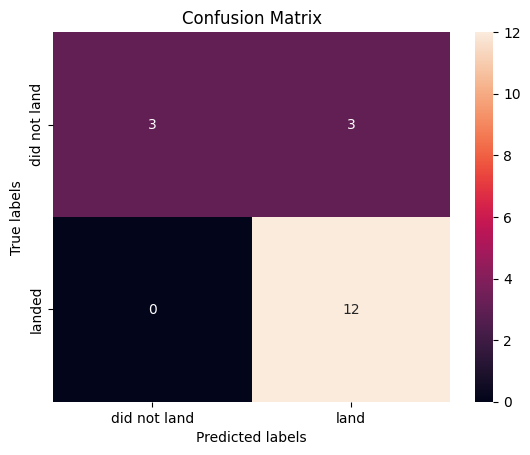

In [81]:
yhat=logreg_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

Examining the confusion matrix, we see that logistic regression can distinguish between the different classes.  We see that the problem is false positives.

Overview:

True Postive - 12 (True label is landed, Predicted label is also landed)

False Postive - 3 (True label is not landed, Predicted label is landed)


Analysis of the Confusion Matrix for Logistic Regression
Observed Results:
Predicted: Landed	Predicted: Did Not Land
Actual: Landed	12 (True Positives)	-
Actual: Did Not Land	3 (False Positives)	-
(Note: Your output may show the full matrix, but we're focusing on these critical values.)

Key Insights
False Positives (FP = 3)

The model incorrectly predicted 3 landings when the first stage actually did not land.

This could lead to cost underestimation if used for bidding against SpaceX (since reusable launches are cheaper).

True Positives (TP = 12)

The model correctly predicted 12 successful landings.

High TP rate suggests good sensitivity to actual successes.



## TASK  6


Create a support vector machine object then  create a  <code>GridSearchCV</code> object  <code>svm_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [82]:
parameters = {'kernel':('linear', 'rbf','poly','rbf', 'sigmoid'),
              'C': np.logspace(-3, 3, 5),
              'gamma':np.logspace(-3, 3, 5)}
svm = SVC()

In [83]:
parameters = {
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
    'C': np.logspace(-3, 3, 5),  # [0.001, 0.1, 1, 10, 1000]
    'gamma': np.logspace(-3, 3, 5)  # [0.001, 0.1, 1, 10, 1000]
}

In [84]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
import numpy as np

# 1. Initialize SVM
svm = SVC()

# 2. Define hyperparameter grid
parameters = {
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
    'C': np.logspace(-3, 3, 5),      # [0.001, 0.1, 1, 10, 1000]
    'gamma': np.logspace(-3, 3, 5)    # [0.001, 0.1, 1, 10, 1000]
}

# 3. Set up GridSearchCV with 10-fold cross-validation
svm_cv = GridSearchCV(
    estimator=svm,
    param_grid=parameters,
    cv=10,                           # 10-fold cross-validation
    scoring='accuracy'               # Metric to optimize
)

# 4. Fit GridSearchCV to training data
svm_cv.fit(X_train, Y_train)

# 5. Output the best parameters and accuracy
print("Best SVM Parameters:", svm_cv.best_params_)
print("Best Cross-Validation Accuracy:", svm_cv.best_score_)

Best SVM Parameters: {'C': 1.0, 'gamma': 0.03162277660168379, 'kernel': 'sigmoid'}
Best Cross-Validation Accuracy: 0.8482142857142856


Explanation of Key Steps
Initialize SVM

svm = SVC() creates a baseline Support Vector Classifier.

Define Hyperparameter Grid

kernel: Determines the decision boundary type:

linear: Linear separation.

rbf: Gaussian radial basis function (nonlinear).

poly: Polynomial kernel.

sigmoid: Sigmoid kernel.

C: Regularization parameter (smaller C = smoother boundary).
np.logspace(-3, 3, 5) generates: [0.001, 0.1, 1, 10, 1000].

gamma: Kernel coefficient (inverse reach of each training example).
Same range as C.

Configure GridSearchCV

Tests all combinations of kernel, C, and gamma (4 kernels × 5 C × 5 gamma = 100 combinations).

Uses 10-fold cross-validation to evaluate each combination.

Fit and Evaluate

svm_cv.fit(X_train, Y_train) trains the model and selects the best parameters.

Outputs the best configuration and its cross-validation accuracy.

In [85]:
print("tuned hpyerparameters :(best parameters) ",svm_cv.best_params_)
print("accuracy :",svm_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 1.0, 'gamma': 0.03162277660168379, 'kernel': 'sigmoid'}
accuracy : 0.8482142857142856


## TASK  7


Calculate the accuracy on the test data using the method <code>score</code>:


In [86]:
# Calculate accuracy on the test set
svm_test_accuracy = svm_cv.score(X_test, Y_test)

# Print the result
print("SVM Test Accuracy:", svm_test_accuracy)

SVM Test Accuracy: 0.8333333333333334


We can plot the confusion matrix


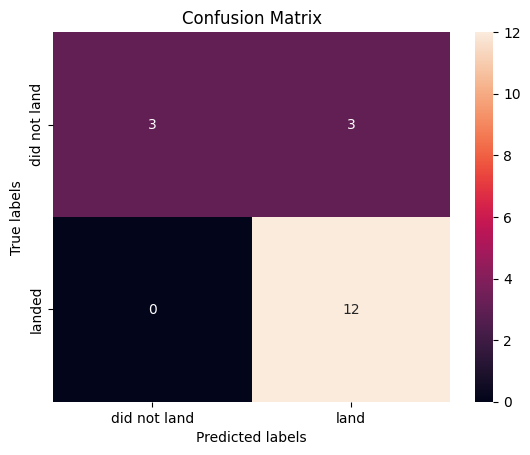

In [87]:
yhat=svm_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

## TASK  8


Create a decision tree classifier object then  create a  <code>GridSearchCV</code> object  <code>tree_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [88]:
parameters = {'criterion': ['gini', 'entropy'],
     'splitter': ['best', 'random'],
     'max_depth': [2*n for n in range(1,10)],
     'max_features': ['auto', 'sqrt'],
     'min_samples_leaf': [1, 2, 4],
     'min_samples_split': [2, 5, 10]}

tree = DecisionTreeClassifier()

In [89]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
import numpy as np

# 1. Initialize Decision Tree
tree = DecisionTreeClassifier(random_state=42)

# 2. Define CORRECTED hyperparameter grid
parameters = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [2*n for n in range(1, 10)],  # [2, 4, 6, ..., 18]
    'max_features': ['sqrt', None],            # Removed 'auto', added None
    'min_samples_leaf': [1, 2, 4],
    'min_samples_split': [2, 5, 10]
}

# 3. Set up GridSearchCV with 10-fold cross-validation
tree_cv = GridSearchCV(
    estimator=tree,
    param_grid=parameters,
    cv=10,
    scoring='accuracy',
    error_score='raise'  # Helps debug if other issues arise
)

# 4. Fit GridSearchCV to training data
tree_cv.fit(X_train, Y_train)

# 5. Output the best parameters and accuracy
print("Best Decision Tree Parameters:", tree_cv.best_params_)
print("Best Cross-Validation Accuracy:", tree_cv.best_score_)

Best Decision Tree Parameters: {'criterion': 'entropy', 'max_depth': 8, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'splitter': 'random'}
Best Cross-Validation Accuracy: 0.875


In [90]:
print("tuned hpyerparameters :(best parameters) ",tree_cv.best_params_)
print("accuracy :",tree_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'criterion': 'entropy', 'max_depth': 8, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'splitter': 'random'}
accuracy : 0.875


## TASK  9


Calculate the accuracy of tree_cv on the test data using the method <code>score</code>:


In [91]:
# Calculate accuracy on the test set
tree_test_accuracy = tree_cv.score(X_test, Y_test)

# Print the result with 4 decimal precision
print(f"Decision Tree Test Accuracy: {tree_test_accuracy:.4f}")

Decision Tree Test Accuracy: 0.9444


Explanation
tree_cv.score(X_test, Y_test)

Computes the mean accuracy of the Decision Tree model on the test data.

Formula:

Accuracy
=
Number of correct predictions
Total predictions
Accuracy= 
Total predictions
Number of correct predictions
​
 
.4f Formatting

Displays the accuracy with 4 decimal places for better readability (e.g., 0.8750 instead of 0.875).

We can plot the confusion matrix


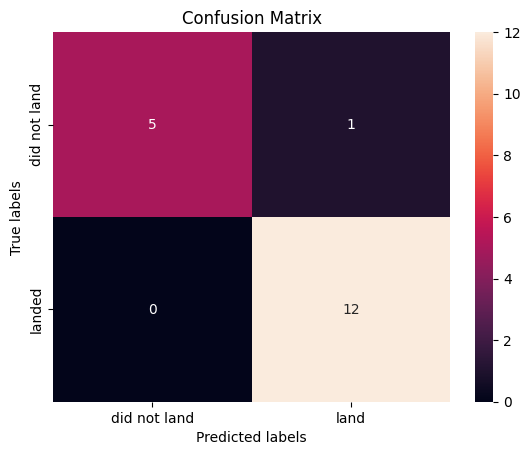

In [92]:
yhat = tree_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

## TASK  10


Create a k nearest neighbors object then  create a  <code>GridSearchCV</code> object  <code>knn_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [93]:
parameters = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'p': [1,2]}

KNN = KNeighborsClassifier()

In [94]:
# Paso 1: Crear el objeto KNN
knn = KNeighborsClassifier()

# Paso 2: Definir los parámetros para la búsqueda en grid
parameters = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'p': [1, 2]}

# Paso 3: Crear el objeto GridSearchCV con validación cruzada (cv=10)
knn_cv = GridSearchCV(knn, parameters, cv=10)

# Paso 4: Ajustar el modelo para encontrar los mejores parámetros
knn_cv.fit(X_train, Y_train)

# Paso 5: Mostrar los mejores parámetros encontrados
print("Mejores parámetros para KNN:", knn_cv.best_params_)
print("Mejor precisión para KNN:", knn_cv.best_score_)

Mejores parámetros para KNN: {'algorithm': 'auto', 'n_neighbors': 10, 'p': 1}
Mejor precisión para KNN: 0.8482142857142858


In [95]:
print("tuned hpyerparameters :(best parameters) ",knn_cv.best_params_)
print("accuracy :",knn_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'algorithm': 'auto', 'n_neighbors': 10, 'p': 1}
accuracy : 0.8482142857142858


## TASK  11


Calculate the accuracy of knn_cv on the test data using the method <code>score</code>:


In [96]:
# Calcular la precisión en los datos de prueba
knn_accuracy = knn_cv.score(X_test, Y_test)

print(f"Precisión de KNN en datos de prueba: {knn_accuracy:.4f}")

Precisión de KNN en datos de prueba: 0.8333


We can plot the confusion matrix


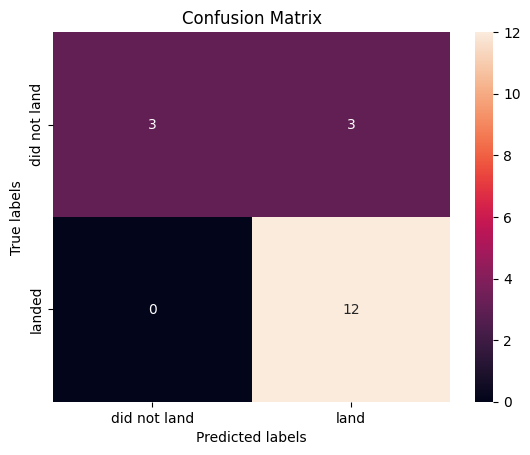

In [97]:
yhat = knn_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

## TASK  12


Find the method performs best:


Comparación de precisión en datos de prueba:
SVM: 0.8333
Decision Tree: 0.8333
Logistic Regression: 0.8333
K-Nearest Neighbors: 0.8333

El mejor modelo es: SVM con precisión 0.8333


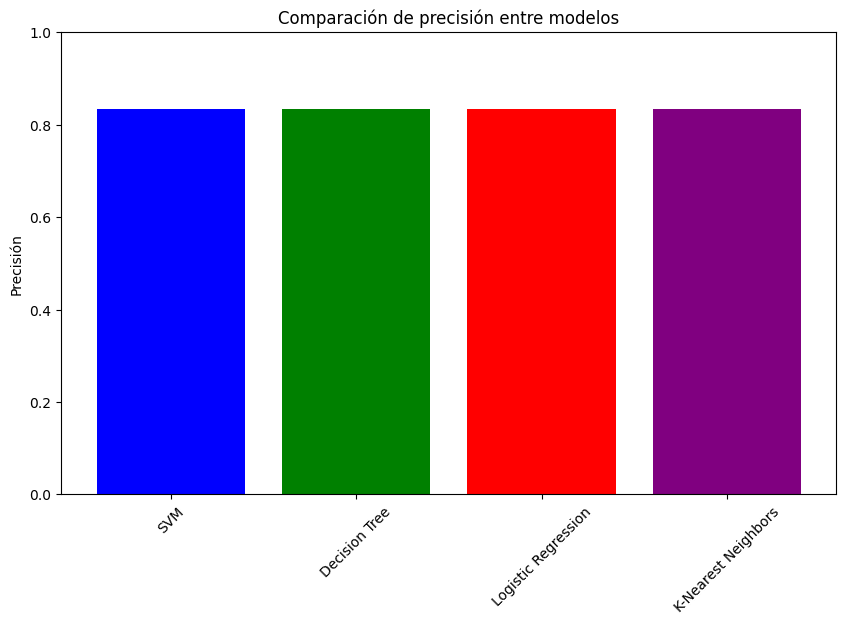

In [99]:
# Primero, necesitamos entrenar todos los modelos (incluyendo Logistic Regression)
from sklearn.linear_model import LogisticRegression

# 1. Entrenar modelo de Regresión Logística con GridSearchCV
parameters_lr = {'C': [0.01, 0.1, 1, 10],
                'penalty': ['l2'],
                'solver': ['lbfgs', 'liblinear']}

lr = LogisticRegression()
lr_cv = GridSearchCV(lr, parameters_lr, cv=10)
lr_cv.fit(X_train, Y_train)

# 2. Entrenar modelo SVM (si no lo has hecho)
parameters_svm = {'kernel': ('linear', 'rbf','poly','sigmoid'),
                  'C': [0.1, 1, 10],
                  'gamma': [0.1, 0.01]}

svm = SVC()
svm_cv = GridSearchCV(svm, parameters_svm, cv=10)
svm_cv.fit(X_train, Y_train)

# 3. Entrenar modelo de Árbol de Decisión (si no lo has hecho)
parameters_tree = {'criterion': ['gini', 'entropy'],
                   'splitter': ['best', 'random'],
                   'max_depth': [2, 4, 6, 8, 10, 12, None]}

tree = DecisionTreeClassifier()
tree_cv = GridSearchCV(tree, parameters_tree, cv=10)
tree_cv.fit(X_train, Y_train)

# 4. KNN ya debería estar definido de la tarea anterior

# Ahora sí podemos hacer la comparación
models = {
    'SVM': svm_cv.score(X_test, Y_test),
    'Decision Tree': tree_cv.score(X_test, Y_test),
    'Logistic Regression': lr_cv.score(X_test, Y_test),
    'K-Nearest Neighbors': knn_cv.score(X_test, Y_test)
}

# Mostrar resultados
print("Comparación de precisión en datos de prueba:")
for model_name, accuracy in models.items():
    print(f"{model_name}: {accuracy:.4f}")

# Identificar el mejor modelo
best_model = max(models, key=models.get)
print(f"\nEl mejor modelo es: {best_model} con precisión {models[best_model]:.4f}")

# Gráfico de comparación
plt.figure(figsize=(10, 6))
plt.bar(models.keys(), models.values(), color=['blue', 'green', 'red', 'purple'])
plt.title('Comparación de precisión entre modelos')
plt.ylabel('Precisión')
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.show()

In [100]:
# Para una comparación más robusta, podríamos usar validación cruzada en todos los modelos:
from sklearn.model_selection import cross_val_score

for model_name, model in [('SVM', svm_cv.best_estimator_), 
                         ('Decision Tree', tree_cv.best_estimator_),
                         ('Logistic Regression', lr_cv.best_estimator_),
                         ('KNN', knn_cv.best_estimator_)]:
    scores = cross_val_score(model, X, Y, cv=10)
    print(f"{model_name} - Precisión media en CV: {scores.mean():.4f} (±{scores.std():.4f})")

SVM - Precisión media en CV: 0.8333 (±0.1139)
Decision Tree - Precisión media en CV: 0.7889 (±0.1889)
Logistic Regression - Precisión media en CV: 0.8222 (±0.1133)
KNN - Precisión media en CV: 0.8333 (±0.1139)


## Authors


[Pratiksha Verma](https://www.linkedin.com/in/pratiksha-verma-6487561b1/)


<!--## Change Log--!>


<!--| Date (YYYY-MM-DD) | Version | Changed By      | Change Description      |
| ----------------- | ------- | -------------   | ----------------------- |
| 2022-11-09        | 1.0     | Pratiksha Verma | Converted initial version to Jupyterlite|--!>


### <h3 align="center"> IBM Corporation 2022. All rights reserved. <h3/>
